In [1]:
import os
import pandas as pd
import datetime

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import importlib


from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import callbacks  

# project specific
from utils import data_handler
from utils.models import vanilla_autoencoder

In [18]:
%load_ext tensorboard
!rm -rf ../workfiles/logs/


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [5]:
importlib.reload(data_handler) # to allow modification of the script without restarting the whole session
sgdc_params = {
            #'penalty':["elasticnet", "l1", "l2"],
            'penalty':["l1"],
            #'l1_ratio':np.linspace(0.1, 1, 5),
            'alpha':np.linspace(0.1, 0.5, 5),
        }

x_train, filenames, n_genes = data_handler.generate_dataset(feature_selection_threshold = 2, 
                                                   feature_selection_proceedure = "LASSO", 
                                                   retain_phases="2", 
                                                   return_filenames= True,
                                                   sgdc_params = sgdc_params,
                                                   #subsample = 500,
                                                   #class_balancing = "match_smaller_sample")
                                                   class_balancing = "balanced")


retained phase 2
loading samples...


In [5]:
#x_train, filenames = data_handler.generate_dataset(feature_selection_threshold = 5, retain_phases="2", return_filenames= True, batch_size = 128)

sgdc_params = {
            #'penalty':["elasticnet", "l1", "l2"],
            'penalty':["l1"], # LASSO selection
            #'l1_ratio':np.linspace(0.1, 1, 5),
            'alpha':np.linspace(0.1, 0.5, 5),
        }

x_train, filenames, n_genes = data_handler.generate_dataset(feature_selection_threshold = None, 
                                                   feature_selection_proceedure = "LASSO", 
                                                   retain_phases="2", 
                                                   return_filenames= True,
                                                   sgdc_params = sgdc_params)

retained phase 2
loading samples...
loaded 2787 samples
selecting genes based on LASSO-like classification...
standardisation for LASSO regression...
Classes : obs for a given class Counter({1: 2064, 2: 365, 4: 195, 3: 163})
minimum: 163
1 -> 2064
2064
2 -> 365
365
4 -> 195
195
3 -> 163
163
(652, 95309)
(652,)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END .............alpha=0.1, penalty=l1;, score=0.346 total time=13.4min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END .............alpha=0.1, penalty=l1;, score=0.267 total time=14.5min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END .............alpha=0.1, penalty=l1;, score=0.262 total time=15.4min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END .............alpha=0.1, penalty=l1;, score=0.267 total time=15.5min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END .............alpha=0.2, penalty=l1;, score=0.237 total time=12.7min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END .............alpha=0.2, penalty=l1;, score=0.282 total time=15.2min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END .............alpha=0.1, penalty=l1;, score=0.285 total time=17.5min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END .............alpha=0.2, penalty=l1;, score=0.215 total time=15.8min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END alpha=0.30000000000000004, penalty=l1;, score=0.237 total time=15.2min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END .............alpha=0.2, penalty=l1;, score=0.285 total time=18.3min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END .............alpha=0.2, penalty=l1;, score=0.285 total time=18.2min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END alpha=0.30000000000000004, penalty=l1;, score=0.282 total time=18.0min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END .............alpha=0.4, penalty=l1;, score=0.221 total time= 8.0min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END alpha=0.30000000000000004, penalty=l1;, score=0.331 total time=14.3min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END alpha=0.30000000000000004, penalty=l1;, score=0.285 total time=16.6min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END alpha=0.30000000000000004, penalty=l1;, score=0.246 total time=16.5min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END .............alpha=0.4, penalty=l1;, score=0.214 total time=11.7min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END .............alpha=0.4, penalty=l1;, score=0.223 total time=12.5min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END .............alpha=0.4, penalty=l1;, score=0.246 total time=10.6min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END .............alpha=0.4, penalty=l1;, score=0.277 total time=14.7min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END .............alpha=0.5, penalty=l1;, score=0.198 total time=15.7min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END .............alpha=0.5, penalty=l1;, score=0.252 total time=14.2min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END .............alpha=0.5, penalty=l1;, score=0.292 total time=16.7min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END .............alpha=0.5, penalty=l1;, score=0.254 total time=14.3min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END .............alpha=0.5, penalty=l1;, score=0.254 total time= 9.6min


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


best score: 0.2853317674691721
best estimator: SGDClassifier(alpha=0.1, penalty='l1')
error rate : 0.5593828489415141
[[1038  353  268  405]
 [ 161   88   54   62]
 [  57   34   36   36]
 [  64   40   25   66]]
number of genes selected :  1014


best estimator: SGDClassifier(alpha=0.2, loss='log', penalty='l1')


In [4]:
latent_dim = 64
t_shape = (6161)

t_shape = (n_genes)


autoencoder = vanilla_autoencoder.generate_model(t_shape, latent_dim)
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

NameError: name 'n_genes' is not defined

In [7]:
checkpoint_filepath = '../workfiles/simple_autoencoer_model/checkpoint'
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True)


reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5,
                              patience=15, min_lr=0.00001)

early_stopping_callback = callbacks.EarlyStopping(monitor='loss', patience=30)


log_dir = "../workfiles/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

cb = [model_checkpoint_callback, reduce_lr, early_stopping_callback, tensorboard_callback]

In [ ]:
%tensorboard --logdir ../workfiles/logs/fit


In [8]:
hist = autoencoder.fit(x_train, epochs=2000, callbacks=cb)

Epoch 1/2000


2023-07-24 19:34:25.694409: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


44/44 [==============================] - 2s 16ms/step - loss: 16.5147 - lr: 0.0010
Epoch 2/2000
44/44 [==============================] - 1s 13ms/step - loss: 2.2374 - lr: 0.0010
Epoch 3/2000
44/44 [==============================] - 1s 13ms/step - loss: 1.4319 - lr: 0.0010
Epoch 4/2000
44/44 [==============================] - 1s 13ms/step - loss: 1.0637 - lr: 0.0010
Epoch 5/2000
44/44 [==============================] - 0s 11ms/step - loss: 0.9221 - lr: 0.0010
Epoch 6/2000
44/44 [==============================] - 1s 13ms/step - loss: 0.7684 - lr: 0.0010
Epoch 7/2000
44/44 [==============================] - 1s 11ms/step - loss: 0.7030 - lr: 0.0010
Epoch 8/2000
44/44 [==============================] - 1s 13ms/step - loss: 0.6641 - lr: 0.0010
Epoch 9/2000
44/44 [==============================] - 1s 12ms/step - loss: 0.6260 - lr: 0.0010
Epoch 10/2000
44/44 [==============================] - 1s 12ms/step - loss: 0.5978 - lr: 0.0010
Epoch 11/2000
44/44 [==============================] - 1s 12m

In [9]:
autoencoder.load_weights(checkpoint_filepath)


[8.158662796020508, 1.9203507900238037, 1.3180402517318726, 1.0204124450683594, 0.8768160343170166, 0.7478849291801453, 0.6864451766014099, 0.6580337285995483, 0.617685854434967, 0.5883337259292603, 0.5696923136711121, 0.5690582990646362, 0.5760281682014465, 0.5605874061584473, 0.5968191623687744, 0.5424475073814392, 0.5507808327674866, 0.5524253845214844, 0.534550130367279, 0.5177528262138367, 0.49968525767326355, 0.46942347288131714, 0.4753822386264801, 0.4852772355079651, 0.4882044196128845, 0.49305057525634766, 0.4825677275657654, 0.46717146039009094, 0.5065830945968628, 0.497230589389801, 0.44520989060401917, 0.43924617767333984, 0.4363645613193512, 0.41996023058891296, 0.411934494972229, 0.41741743683815, 0.4208354651927948, 0.46177753806114197, 0.4531727731227875, 0.4339294731616974, 0.4229859411716461, 0.39964786171913147, 0.39888477325439453, 0.3961602449417114, 0.39161887764930725, 0.3846719264984131, 0.39060917496681213, 0.4013576805591583, 0.43016648292541504, 0.42300972342

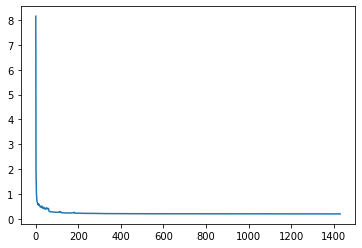

In [10]:
plt.plot(hist.history['loss'])
print(hist.history['loss'])




### some diagnosis

In [11]:
e = iter(x_train).next()
z = autoencoder.encoder(e)
z

<tf.Tensor: shape=(64, 64), dtype=float32, numpy=
array([[ -4.3409867 ,  10.6312    ,   5.3539753 , ...,   3.8908982 ,
         -0.5132886 ,  -0.9586616 ],
       [  2.5525162 ,   3.0138342 ,  -7.361772  , ...,   1.0757438 ,
          6.2007084 ,  -2.2117243 ],
       [ -2.0538888 ,   3.847728  ,   0.0871527 , ...,  -2.2372487 ,
          2.0988824 ,   0.5786437 ],
       ...,
       [-11.874817  ,  12.308254  ,   4.1104183 , ...,   8.449994  ,
         -0.4929868 ,  -2.3119352 ],
       [ -1.853908  ,   0.69640857,   4.9280415 , ...,   0.46084845,
         -0.3452628 ,  -1.7604208 ],
       [ -4.4837513 ,   4.514399  ,   6.8809323 , ...,   3.4960918 ,
          2.5393403 ,  -1.8775568 ]], dtype=float32)>

In [12]:
print(autoencoder.decoder(z))
print(e)

tf.Tensor(
[[ 2.0446498e+00  7.5690851e-02 -1.4629721e-02 ...  2.6101418e-02
  -2.7282130e-02 -6.9476403e-03]
 [ 2.6139543e+00  4.8564572e-02  6.1768601e-03 ... -5.2386895e-06
  -1.3371881e-02 -6.2486902e-04]
 [ 2.1846600e+00 -4.9133848e-02 -3.5850396e-03 ...  6.6926546e-02
  -1.5641909e-02 -1.3021864e-03]
 ...
 [ 1.5362992e+00  3.2641936e-02  3.3894457e-02 ...  6.1967753e-02
  -1.4914494e-02 -3.2651890e-03]
 [-2.4610366e-01  9.8601833e-02  3.0849703e-02 ...  1.7632104e-02
   5.9888531e-02 -1.8713661e-03]
 [ 7.2676444e-01  9.5868513e-02 -6.2034689e-02 ... -1.5628092e-02
   3.0135948e-02 -1.7203279e-03]], shape=(64, 1014), dtype=float32)
tf.Tensor(
[[2.51771   0.        0.        ... 0.        0.        0.       ]
 [4.22784   0.        0.        ... 0.        0.        0.       ]
 [2.08471   0.        0.        ... 0.        0.        0.       ]
 ...
 [3.4379    0.        0.        ... 0.        0.        0.       ]
 [0.        0.249543  0.        ... 0.        0.        0.       ]
 [0.

In [13]:
autoencoder.encoder.save('../workfiles/test')


INFO:tensorflow:Assets written to: ../workfiles/test/assets


In [14]:
compressed_dataframe = autoencoder.encoder.predict(x_train)

44/44 [==============================] - 0s 1ms/step


In [15]:
df = pd.DataFrame(compressed_dataframe)
df["name"] = filenames

In [16]:
#df.to_csv("../workfiles/compressed_data_simple_autoencoder_phase_2.csv")
df.to_csv("../workfiles/LASSO_wrong.csv", index=False)
